<a href="https://colab.research.google.com/github/NodirYunusov/yunusov99/blob/main/Tashkent_house_price_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


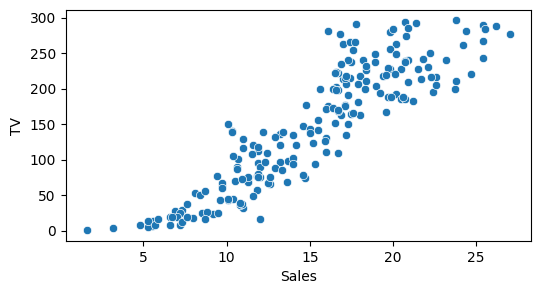

In [32]:
plt.figure(figsize = (6,3))
sns.scatterplot(df, x = 'Sales', y = 'TV')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, random_state = 34, test_size = 0.10)


In [35]:
x_train  = np.asanyarray(df[['TV']])
y_train = np.asanyarray(df[['Sales']])

In [36]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()


In [37]:
LR_model.fit(x_train, y_train)

LinearRegression()

In [38]:
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(f"{theta1=}")
print(f"{theta0=}")

theta1=0.055464770469558874
theta0=6.974821488229891


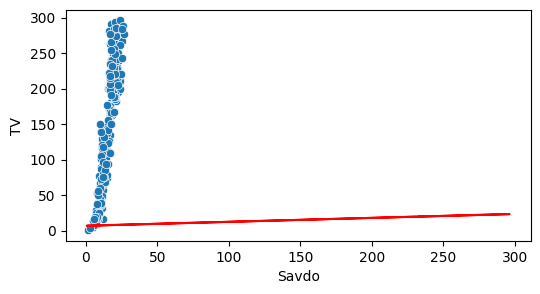

In [39]:
plt.figure(figsize = (6,3))
sns.scatterplot(df, x = 'Sales', y = 'TV')
plt.plot(x_train, theta1*x_train + theta0, "-r")
plt.xlabel("Savdo")
plt.ylabel("TV")
plt.show()

In [55]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [56]:
LR_model.fit(x_test, y_test)

LinearRegression()

In [57]:
test_data = test_set.sample(20)

In [58]:
Real_sales = test_set.loc[test_data.index]

In [67]:
y_predict = LR_model.predict(x_test)

In [63]:
Real_sales

,TV,Radio,Newspaper,Sales
26,142.9,29.3,12.6,15.0
10,66.1,5.8,24.2,12.6
142,220.5,33.2,37.9,20.1
180,156.6,2.6,8.3,15.5
184,253.8,21.3,30.0,17.6
97,184.9,21.0,22.0,20.5
189,18.7,12.1,23.4,6.7
40,202.5,22.3,31.6,16.6
64,131.1,42.8,28.9,16.0
195,38.2,3.7,13.8,7.6


In [68]:
y_predict

array([[18.92522488],
       [10.55566829],
       [23.14125406],
       [ 8.97039586],
       [13.08983138],
       [19.32864546],
       [ 7.81695391],
       [13.39097632],
       [10.18633959],
       [21.22074481],
       [15.69786022],
       [14.24895531],
       [ 8.36242399],
       [ 7.86240975],
       [14.91942895],
       [22.95374872],
       [17.30586057],
       [15.40807924],
       [18.30588905],
       [18.70930964]])

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=1.7276013194316882
RMSE=2.021270215559539
